<a href="https://colab.research.google.com/github/tusharsgaidhane/GTA-Capstone-Project/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/MyDrive/AlmaBetter/Module 10: Capstone Project/EDA: Global Terrorism Analysis/Global Terrorism Data.csv"
df = pd.read_csv(file_path,  encoding = "ISO-8859-1", engine='python')

In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,...,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,...,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,4.0,Unknown,-99.0,Houses were damaged in this attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,...,NaN,NaN,A thrown grenade was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,1.0,0,NaN,12/31/2017: An explosive device was discovered...,1,1,1,0.0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,20,Unknown,NaN,NaN,Unknown,Unknown,...,NaN,NaN,An explosive device containing a detonating co...,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## The 2nd last row contains data of a attack/incident happened particularly in India. So, it will help us understand and relate the features in the dataset more clearly. Lets check

In [ ]:
a = df.loc[181689]
pd.DataFrame(a).transpose()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,South Asia,Manipur,Imphal,24.7983,93.9404,1,0,The incident occurred in the Mantripukhri neig...,12/31/2017: Assailants threw a grenade at a Fo...,1,1,1,0,NaN,NaN,0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),21,Government Building/Facility/Office,Forest Department Manipur,Office,...,NaN,NaN,A thrown grenade was used in the attack.,0,0,0,0,0,0,-9,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [ ]:
df.shape

(181691, 135)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [ ]:
df.describe(include = 'all')

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
count,1.816910e+05,181691.000000,181691.000000,181691.000000,9239,181691.000000,2220,181691.000000,181691,181691.000000,181691,181270,181257,177135.000000,1.771340e+05,181685.000000,181691.000000,55495,115562,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,29011,181690.000000,181691.000000,181691.000000,181691.000000,181691,6314.000000,6314,428.000000,428,181691.000000,181691,171318.000000,171318,139141,181055,...,70.000000,70,114021,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,64065,3.898900e+04,57959,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,324,3305,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,514,10991.000000,10991,10400.000000,28289,115500,76933,43516,181691,181691.000000,181691.000000,181691.000000,181691.000000,25038
unique,NaN,NaN,NaN,NaN,2244,NaN,1859,NaN,205,NaN,12,2855,36674,NaN,NaN,NaN,NaN,44109,112492,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,9,NaN,9,NaN,8,NaN,22,NaN,112,33238,86006,...,NaN,16,19148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,19157,NaN,NaN,NaN,NaN,NaN,143,217,NaN,NaN,NaN,NaN,NaN,387,NaN,7,NaN,15429,83988,62263,36090,26,NaN,NaN,NaN,NaN,14306
top,NaN,NaN,NaN,NaN,"September 18-24, 2016",NaN,8/4/1998,NaN,Iraq,NaN,Middle East & North Africa,Baghdad,Unknown,NaN,NaN,NaN,NaN,"The attack took place in Baghdad, Baghdad, Iraq.","09/00/2016: Sometime between September 18, 201...",NaN,NaN,NaN,NaN,NaN,Insurgency/Guerilla Action,NaN,NaN,NaN,NaN,Bombing/Explosion,NaN,Armed Assault,NaN,Facility/Infrastructure Attack,NaN,Private Citizens & Property,NaN,Unnamed Civilian/Unspecified,Unknown,Civilians,...,NaN,Automatic or Semi-Automatic Rifle,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Minor (likely < $1 million),NaN,It is unknown if any property was damaged in t...,NaN,NaN,NaN,NaN,NaN,Unknown,Colombia,NaN,NaN,NaN,NaN,NaN,0,NaN,Unknown,NaN,Casualty numbers for this incident conflict ac...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...","Christopher Hewitt, ""Political Violence and Te...",START Primary Collection,NaN,NaN,NaN,NaN,"201612010023, 201612010024, 201612010025, 2016..."
freq,NaN,NaN,NaN,NaN,101,NaN,18,NaN,24636,NaN,50474,7645,9775,NaN,NaN,NaN,NaN,142,100,NaN,NaN,NaN,NaN,NaN,23410,NaN,NaN,NaN,NaN,88255,NaN,3434,NaN,229,NaN,43511,NaN,11596,16356,6461,...,NaN,16,20925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43304,NaN,6966,NaN,NaN,NaN,NaN,NaN,27,687,NaN,NaN,NaN,NaN,NaN,36,NaN,3606,NaN,1607,205,134,139,78002,NaN,NaN,NaN,NaN,80
mean,2.002705e+11,2002.638997,6.467277,15.505644,NaN,0.045346,NaN,131.968501,NaN,7.160938,NaN,NaN,NaN,23.498343,-4.586957e+02,1.451452,0.068297,NaN,NaN,0.988530,0.993093,0.875668,-0.523171,1.292923,NaN,0.137773,0.889598,0.036507,3.247547,NaN,3.719512,NaN,5.245327,NaN,8.439719,NaN,46.971474,NaN,NaN,NaN,...,10.842857,NaN,NaN,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,NaN,2.088119e+05,NaN,0.059054,4.533230,-0.353999,-46.793933,-32.516371,NaN,NaN,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,NaN,4.629242,NaN,-29.018269,NaN,NaN,NaN,NaN,NaN,-4.543731,-4.464398,0.090010,-3.945952,NaN
std,1.325957e+09,13.2594

In [ ]:
df.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [ ]:
df.shape[0]

181691

In [ ]:
len(df)

181691

In [ ]:
# gt_df = df.dropna(thresh=len(df)*0.6,how='all',axis=1) or

gt_df = df.dropna(thresh=df.shape[0]*0.6,how='all',axis=1)

In [ ]:
gt_df.shape

(181691, 58)

In [ ]:
gt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 58 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181270 non-null  object 
 10  city              181257 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  summary           115562 non-null  object 
 16  crit1             18

In [ ]:
# percentage of null values in each column:
gt_df.isna().sum()/len(gt_df) *100

eventid              0.000000
iyear                0.000000
imonth               0.000000
iday                 0.000000
extended             0.000000
country              0.000000
country_txt          0.000000
region               0.000000
region_txt           0.000000
provstate            0.231712
city                 0.238867
latitude             2.507554
longitude            2.508104
specificity          0.003302
vicinity             0.000000
summary             36.396409
crit1                0.000000
crit2                0.000000
crit3                0.000000
doubtterr            0.000550
multiple             0.000550
success              0.000000
suicide              0.000000
attacktype1          0.000000
attacktype1_txt      0.000000
targtype1            0.000000
targtype1_txt        0.000000
targsubtype1         5.709144
targsubtype1_txt     5.709144
corp1               23.418882
target1              0.350045
natlty1              0.858050
natlty1_txt          0.858050
gname     

In [ ]:
# dropping duplicates that are row based
gt_df.drop_duplicates()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,7.0,NaN,NaN,13,Unknown,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,1.0,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,0.0,0,NaN,NaN,NaN,8,Incendiary,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,0.0,1,0,2,Armed Assault,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,182.0,Somalia,Al-Shabaab,0.0,0,-99.0,0.0,1.0,5,Firearms,5.0,Unknown Gun Type,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,0.0,"""Somalia: Al-Shabaab Militants Attack Army Che...",START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,0.0,1,0,3,Bombing/Explosion,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,167.0,Russia,Muslim extremists,0.0,0,-99.0,0.0,0.0,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,0.0,"""Putin's 'victory' in Syria has turned into a ...",START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,0.0,1,0,7,Facility/Infrastructure Attack,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,160.0,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),0.0,0,-99.0,0.0,0

In [ ]:
gt_df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,181690.000000,181691.000000,181691.000000,181691.000000,181691.000000,171318.000000,180132.000000,181311.000000,181691.000000,110576.000000,112202.000000,115571.000000,181691.000000,160923.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,181513.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,0.137773,0.889598,0.036507,3.247547,8.439719,46.971474,127.686441,0.081440,0.002950,-65.361154,-1.517727,0.049666,6.447325,11.117162,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,0.059054,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.344663,0.313391,0.187549,1.915772,6.653838,30.953357,89.299120,0.273511,0.054234,216.536633,12.830346,1.093195,2.173435,6.495612,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.461244,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,4.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000,22.000000,83.000000,0.000000,0.000000,-99.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,4.000000,35.000000,101.000000,0.000000,0.000000,-99.000000,0.000000,0.000000,6.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,14.000000,74.000000,173.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.000000,16.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,22.000000,113.000000,1004.000000,1.000000,1.000000,25000.000000,406.000000,1.000000,13.000000,31.000000,1570.000000,1360.000000,500.000000,8191.000000,751.000000,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# From dataset we can observe that there are some columns which contain some text data and the columns adjacent to these cols contain the numeric code for the text data.
# We basically need Numeric cols for data processing

### lets check columns containing only numeric values first

In [ ]:
# lets check columns with numeric values only

numeric_cols = gt_df.select_dtypes(include=np.number).columns.tolist()
print(len(numeric_cols))
# print(numeric_cols)
numeric_cols

41


['eventid',
 'iyear',
 'imonth',
 'iday',
 'extended',
 'country',
 'region',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'targtype1',
 'targsubtype1',
 'natlty1',
 'guncertain1',
 'individual',
 'nperps',
 'nperpcap',
 'claimed',
 'weaptype1',
 'weapsubtype1',
 'nkill',
 'nkillus',
 'nkillter',
 'nwound',
 'nwoundus',
 'nwoundte',
 'property',
 'ishostkid',
 'INT_LOG',
 'INT_IDEO',
 'INT_MISC',
 'INT_ANY']

In [ ]:
for i in numeric_cols:
  gt_df[i] = gt_df[i].fillna(gt_df[i].median) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Now we have replaced null values in numeric cols by the median value of that particular col

In [ ]:
gt_df.isna().sum()

eventid                 0
iyear                   0
imonth                  0
iday                    0
extended                0
country                 0
country_txt             0
region                  0
region_txt              0
provstate             421
city                  434
latitude                0
longitude               0
specificity             0
vicinity                0
summary             66129
crit1                   0
crit2                   0
crit3                   0
doubtterr               0
multiple                0
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
targtype1               0
targtype1_txt           0
targsubtype1            0
targsubtype1_txt    10373
corp1               42550
target1               636
natlty1                 0
natlty1_txt          1559
gname                   0
guncertain1             0
individual              0
nperps                  0
nperpcap                0
claimed     

## Now we are left with the text data ie Object or String type datatype.

In [ ]:
# lets check columns with text or object type data only

text_cols = gt_df.select_dtypes(include= object).columns.tolist()
print(len(text_cols))
# print(numeric_cols)
text_cols

36


['country_txt',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'summary',
 'doubtterr',
 'multiple',
 'attacktype1_txt',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'gname',
 'guncertain1',
 'nperps',
 'nperpcap',
 'claimed',
 'weaptype1_txt',
 'weapsubtype1',
 'weapsubtype1_txt',
 'weapdetail',
 'nkill',
 'nkillus',
 'nkillter',
 'nwound',
 'nwoundus',
 'nwoundte',
 'ishostkid',
 'scite1',
 'dbsource']

## Out of all the above text columns, only few are having null values in them. Lets check those text columns which contain null values 

In [ ]:
na_text_col = gt_df.columns[gt_df.isna().any().tolist()]
na_text_col

Index(['provstate', 'city', 'summary', 'targsubtype1_txt', 'corp1', 'target1',
       'natlty1_txt', 'weapsubtype1_txt', 'weapdetail', 'scite1'],
      dtype='object')

In [ ]:
type(na_text_col)

pandas.core.indexes.base.Index

## Now, of these null value containing text columns, we will replace the null values in only few important/significant columns by the **mode** of that particular column.

## Lets check the modes first

In [ ]:
gt_df.describe(include = np.object)

,country_txt,region_txt,provstate,city,latitude,longitude,specificity,summary,doubtterr,multiple,attacktype1_txt,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,nperps,nperpcap,claimed,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,ishostkid,scite1,dbsource
count,181691,181691,181270,181257,181691.000000,181691.000000,181691.0,115562,181691.0,181691.0,181691,181691,181691.0,171318,139141,181055,181691.0,180132,181691,181691.0,181691.0,181691.0,181691.0,181691,181691.0,160923,114021,181691.0,181691.0,181691.0,181691.0,181691.0,181691.0,181691.0,115500,181691
unique,205,12,2855,36674,48323.000000,48040.000000,6.0,112492,4.0,3.0,9,22,113.0,112,33238,86006,216.0,215,3537,3.0,114.0,51.0,4.0,12,31.0,30,19148,206.0,32.0,97.0,239.0,45.0,45.0,4.0,83988,26
top,Iraq,Middle East & North Africa,Baghdad,Unknown,33.303566,44.371773,1.0,"09/00/2016: Sometime between September 18, 201...",0.0,0.0,Bombing/Explosion,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,Unknown,Civilians,95.0,Iraq,Unknown,0.0,-99.0,0.0,0.0,Explosives,16.0,Unknown Explosive Type,Explosive,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Committee on Government Operations United Stat...,START Primary Collection
freq,24636,50474,7645,9775,7521.000000,7521.000000,144996.0,100,138905.0,156658.0,88255,43511,11596.0,11596,16356,6461,24113.0,24113,82782,166545.0,82218.0,106158.0,95091.0,92426,44980.0,44980,20925,88149.0,116344.0,101532.0,103275.0,116342.0,110085.0,167624.0,205,78002


In [ ]:
# mode of each text col:
for i in na_text_col:
  x = gt_df[i].mode()
  print(i)
  print(x)
  print('\n')

provstate
0    Baghdad
dtype: object


city
0    Unknown
dtype: object


summary
0    09/00/2016: Sometime between September 18, 201...
dtype: object


targsubtype1_txt
0    Unnamed Civilian/Unspecified
dtype: object


corp1
0    Unknown
dtype: object


target1
0    Civilians
dtype: object


natlty1_txt
0    Iraq
dtype: object


weapsubtype1_txt
0    Unknown Explosive Type
dtype: object


weapdetail
0    Explosive
dtype: object


scite1
0    Committee on Government Operations United Stat...
dtype: object




In [ ]:
for i in ['provstate','city','target1']:          #leave nationality('natlty1_txt') for now
  gt_df[i] = gt_df[i].fillna(gt_df[i].mode())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Now changes by Pradeep:

In [ ]:
gt_df.columns.to_list()


['eventid',
 'iyear',
 'imonth',
 'iday',
 'extended',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'gname',
 'guncertain1',
 'individual',
 'nperps',
 'nperpcap',
 'claimed',
 'weaptype1',
 'weaptype1_txt',
 'weapsubtype1',
 'weapsubtype1_txt',
 'weapdetail',
 'nkill',
 'nkillus',
 'nkillter',
 'nwound',
 'nwoundus',
 'nwoundte',
 'property',
 'ishostkid',
 'scite1',
 'dbsource',
 'INT_LOG',
 'INT_IDEO',
 'INT_MISC',
 'INT_ANY']

In [ ]:
#let's filter the data as per requirment of analysis
#extended = whether attach extended more than 24 hours
#success = wheather attack controlled in 24 hours or not
#gname = group name

df = gt_df[['iday','imonth','iyear','extended','country_txt','region_txt','provstate','city','latitude','longitude','success',
 'suicide','targtype1_txt','gname','weaptype1_txt','attacktype1_txt'] ]

In [ ]:
df.head()

,iday,imonth,iyear,extended,country_txt,region_txt,provstate,city,latitude,longitude,success,suicide,targtype1_txt,gname,weaptype1_txt,attacktype1_txt
0,2,7,1970,0,Dominican Republic,Central America & Caribbean,Baghdad,Santo Domingo,18.4568,-69.9512,1,0,Private Citizens & Property,MANO-D,Unknown,Assassination
1,0,0,1970,0,Mexico,North America,Federal,Mexico city,19.3719,-99.0866,1,0,Government (Diplomatic),23rd of September Communist League,Unknown,Hostage Taking (Kidnapping)
2,0,1,1970,0,Philippines,Southeast Asia,Tarlac,Unknown,15.4786,120.6,1,0,Journalists & Media,Unknown,Unknown,Assassination
3,0,1,1970,0,Greece,Western Europe,Attica,Athens,37.9975,23.7627,1,0,Government (Diplomatic),Unknown,Explosives,Bombing/Explosion
4,0,1,1970,0,Japan,East Asia,Fukouka,Fukouka,33.5804,130.396,1,0,Government (Diplomatic),Unknown,Incendiary,Facility/Infrastructure Attack


In [ ]:
# let's rename the columns in proper format

df.rename(columns = {'iday':'day','imonth':'month','iyear':'year','country_txt':'country','region_txt':'region','targtype1_txt':'target_type','gname':'group_name','weaptype1_txt':'weaptype','attacktype1_txt':'attacktype'},inplace=True)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,day,month,year,extended,country,region,provstate,city,latitude,longitude,success,suicide,target_type,group_name,weaptype,attacktype
0,2,7,1970,0,Dominican Republic,Central America & Caribbean,Baghdad,Santo Domingo,18.4568,-69.9512,1,0,Private Citizens & Property,MANO-D,Unknown,Assassination
1,0,0,1970,0,Mexico,North America,Federal,Mexico city,19.3719,-99.0866,1,0,Government (Diplomatic),23rd of September Communist League,Unknown,Hostage Taking (Kidnapping)
2,0,1,1970,0,Philippines,Southeast Asia,Tarlac,Unknown,15.4786,120.6,1,0,Journalists & Media,Unknown,Unknown,Assassination
3,0,1,1970,0,Greece,Western Europe,Attica,Athens,37.9975,23.7627,1,0,Government (Diplomatic),Unknown,Explosives,Bombing/Explosion
4,0,1,1970,0,Japan,East Asia,Fukouka,Fukouka,33.5804,130.396,1,0,Government (Diplomatic),Unknown,Incendiary,Facility/Infrastructure Attack


In [ ]:
print(df['region'].unique())
print(df['region'].value_counts())
print(len(df['region'].unique()))

['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'Australasia & Oceania'
 'South Asia' 'Central Asia']
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region, dtype: int64
12


In [ ]:
print(df['country'].unique())
print(df['country'].value_counts())
print(len(df['country'].unique()))

['Dominican Republic' 'Mexico' 'Philippines' 'Greece' 'Japan'
 'United States' 'Uruguay' 'Italy' 'East Germany (GDR)' 'Ethiopia'
 'Guatemala' 'Venezuela' 'West Germany (FRG)' 'Switzerland' 'Jordan'
 'Spain' 'Brazil' 'Egypt' 'Argentina' 'Lebanon' 'Ireland' 'Turkey'
 'Paraguay' 'Iran' 'United Kingdom' 'Colombia' 'Bolivia' 'Nicaragua'
 'Netherlands' 'Belgium' 'Canada' 'Australia' 'Pakistan' 'Zambia' 'Sweden'
 'Costa Rica' 'South Yemen' 'Cambodia' 'Israel' 'Poland' 'Taiwan' 'Panama'
 'Kuwait' 'West Bank and Gaza Strip' 'Austria' 'Czechoslovakia' 'India'
 'France' 'South Vietnam' 'Brunei' 'Zaire'
 "People's Republic of the Congo" 'Portugal' 'Algeria' 'El Salvador'
 'Thailand' 'Haiti' 'Sudan' 'Morocco' 'Cyprus' 'Myanmar' 'Afghanistan'
 'Peru' 'Chile' 'Honduras' 'Yugoslavia' 'Ecuador' 'New Zealand' 'Malaysia'
 'Singapore' 'Botswana' 'Jamaica' 'Chad' 'North Yemen' 'Andorra' 'Syria'
 'South Korea' 'United Arab Emirates' 'South Africa' 'Kenya' 'Iraq'
 'Somalia' 'Tanzania' 'Sri Lanka' 'Namibia' '

In [ ]:
print(df['target_type'].unique())
print(df['target_type'].value_counts())
print(len(df['target_type'].unique()))

['Private Citizens & Property' 'Government (Diplomatic)'
 'Journalists & Media' 'Police' 'Utilities' 'Military'
 'Government (General)' 'Airports & Aircraft' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Religious Figures/Institutions' 'Unknown' 'Transportation' 'Tourists'
 'NGO' 'Telecommunication' 'Food or Water Supply'
 'Terrorists/Non-State Militia' 'Other' 'Maritime' 'Abortion Related']
Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft      

In [ ]:
print(df['group_name'].unique())
print(df['group_name'].value_counts())
print(len(df['group_name'].unique()))

['MANO-D' '23rd of September Communist League' 'Unknown' ...
 'Fatoni Warriors' 'Minorities of Metropolitan Attacks'
 'Baloch Republican Party']
Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Anti-Capitalist Action                                  1
Youth of the Land of Egypt                              1
Opponents of Regime                                     1
Pakistani trained terrorists                            1
22 May 1948                                             1
Name: group_name, Length: 3537, dtype: int64
3537


In [ ]:
print(df['weaptype'].unique())
print(df['weaptype'].value_counts())
print(len(df['weaptype'].unique()))

['Unknown' 'Explosives' 'Incendiary' 'Firearms' 'Chemical' 'Melee'
 'Sabotage Equipment'
 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'
 'Fake Weapons' 'Radiological' 'Other' 'Biological']
Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological    

## Let's start some analysis through visualization

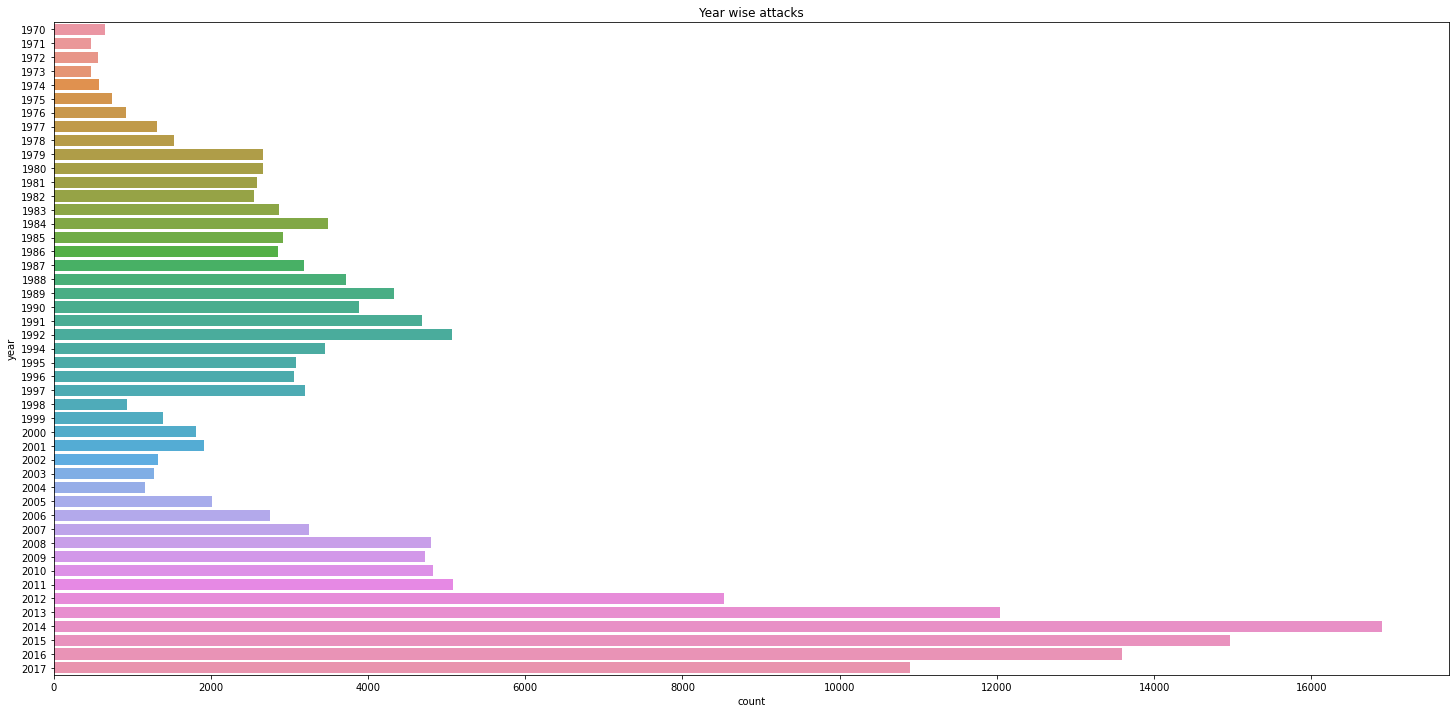

In [ ]:
# check no. of attacks in every year

plt.figure(figsize=(25, 12))
plt.title('Year wise attacks')
plt.xlabel('Count')
plt.ylabel('Year')
sns.countplot(y='year',data=df)

##**Insight** 

---



1.    Most attacks in the year of **2014**.
2.    Least attacks in the year of **1971**.
3. There is **significant rise/increase in no. of terrorist attacks** just in one decade ie **in last decade of 2010-20**.


 

*for more palette refer* [https://seaborn.pydata.org/tutorial/color_palettes.html](https://)

In [ ]:
df.month.value_counts()
months = list(df.month.value_counts().index)
attacks_count = list(df.month.value_counts().values)

In [ ]:
print(months)
print(attacks_count)

[5, 7, 8, 10, 6, 3, 4, 1, 11, 9, 2, 12, 0]
[16875, 16268, 15800, 15563, 15359, 15257, 15152, 14936, 14906, 14180, 13879, 13496, 20]


### We can see that there are 0 in the month column but the attack count corresponding to these zero label months is just 20. So, we can ignore these instances.

In [ ]:
df1 = df[df['month'] != 0]

In [ ]:
df1.month.value_counts()
months = list(df1.month.value_counts().index)
attacks_count = list(df1.month.value_counts().values)

In [ ]:
print(months)
print(attacks_count)

[5, 7, 8, 10, 6, 3, 4, 1, 11, 9, 2, 12]
[16875, 16268, 15800, 15563, 15359, 15257, 15152, 14936, 14906, 14180, 13879, 13496]


### We have got rid of those Zero valued months without any significant loss of data.

(10000.0, 20000.0)

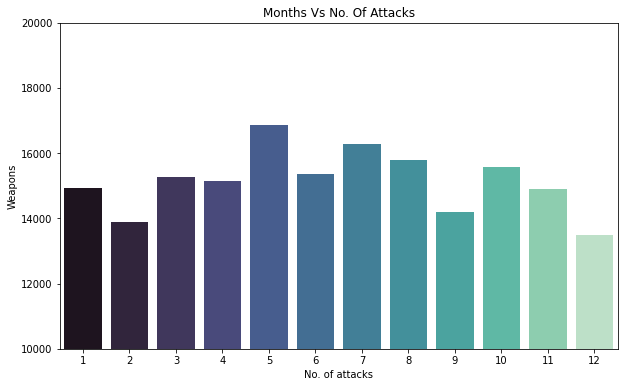

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Months Vs No. Of Attacks')
plt.xlabel('No. of attacks')
plt.ylabel('Weapons')
sns.barplot(x = months, y = attacks_count, palette='mako').set_ylim(10000,20000)



###**Insight** 


---
Most number of Terrorist Attacks happened in month of
* May &
* July

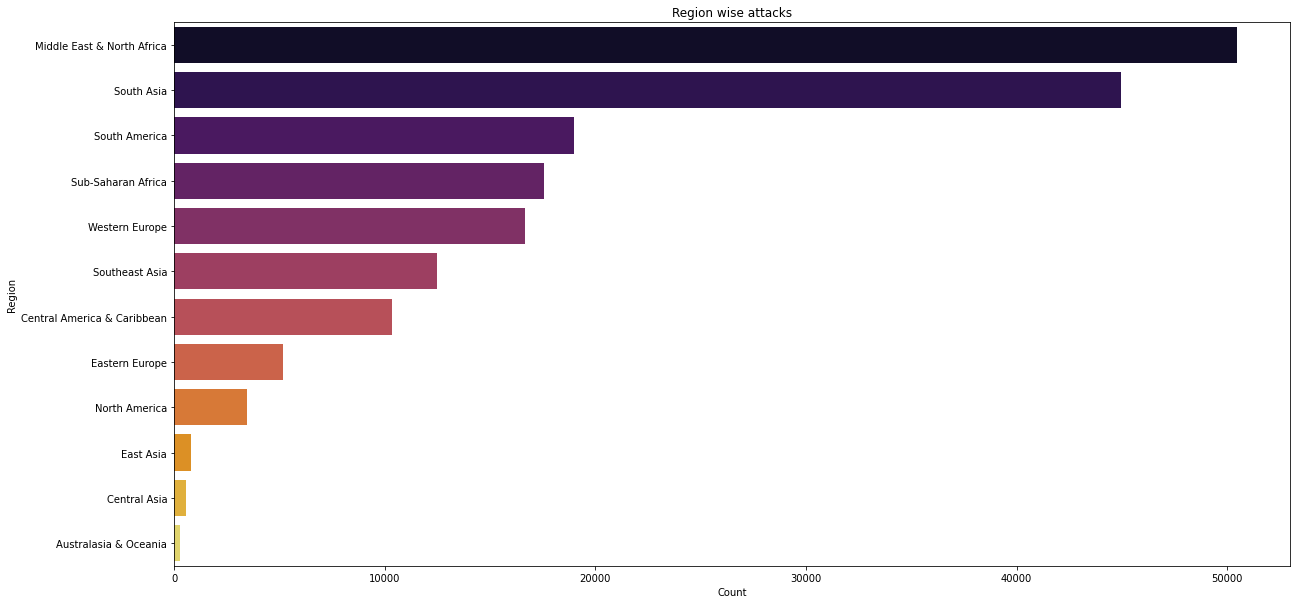

In [ ]:
# let's check region wise attacks

plt.figure(figsize=(20, 10))
plt.title('Region wise attacks')
plt.xlabel('Count')
plt.ylabel('Region')
# sns.barplot(x = df.region.value_counts().index , y = df.region.value_counts().values)
sns.barplot(y = df.region.value_counts().index , x = df.region.value_counts().values, palette='inferno')

# print(df.region.value_counts())

**Insight**  -- Most Aattacked Region ( Top 5 )*



---




*   *Middle East & North Africa*
*   *South Asia*
*   *South America*
*   *Sub-Saharan Africa*
*   *Western Europe*





 

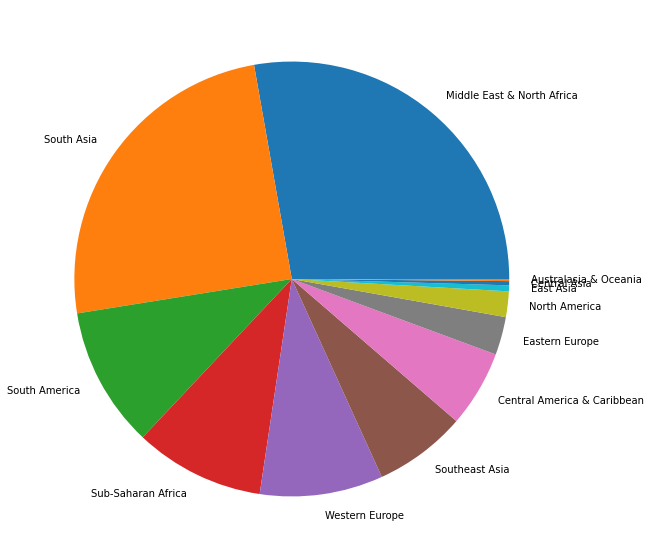

In [ ]:
data = df.region.value_counts().values
reg = df.region.value_counts().index
plt.figure(figsize =(15, 10))
plt.pie(data, labels = reg)

# show plot
plt.show()

In [ ]:
df.country.value_counts().values[:10]
df.country.value_counts().index[:10]

Index(['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia', 'Philippines',
       'Peru', 'El Salvador', 'United Kingdom', 'Turkey'],
      dtype='object')

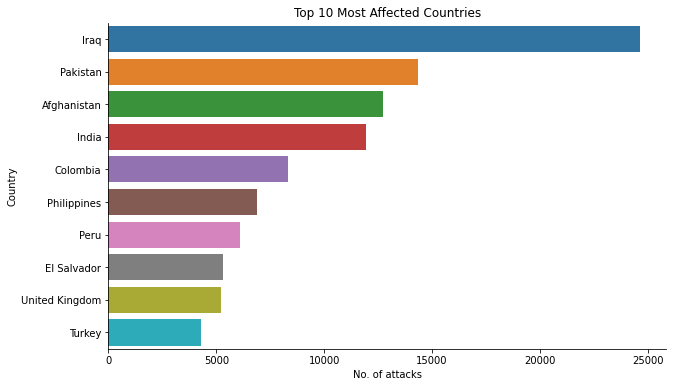

In [ ]:
# Lets check the Most Hit countries:

plt.subplots(figsize=(10,6))
plt.title('Top 10 Most Affected Countries')
plt.xlabel('No. of attacks')
plt.ylabel('Country')
# sns.set_color_codes("muted")
sns.color_palette("pastel") # Set2 , ("husl", 9), ("flare", as_cmap=True)"pastel"
sns.barplot( x = df.country.value_counts().values[:10], y=df.country.value_counts().index[:10] )
sns.despine()
# plt.show()

###Lets check the Region to which these countries belongs

In [ ]:
df[df['country']=='Iraq']['region'].unique()

array(['Middle East & North Africa'], dtype=object)

In [ ]:
df[df['country']=='Afghanistan']['region'].unique()

array(['South Asia'], dtype=object)

In [ ]:
df[df['country']=='El Salvador']['region'].unique()

array(['Central America & Caribbean'], dtype=object)

**Insight**  -- Most Aattacked Countries ( Top 10 )*



---




*   *Iraq*
*   *Pakistan*
*   *Afghanistan*
*   *India*
*   *Columbia*
*   *Philippines*
*   *Peru*
*   *El Salvador*
*   *United Kingdom*
*   *Turkey*

###**Also,**

From the above data we can see that though the region of Middle East & North Africa is Heavily affected by terrorism but the worst hit countries or mostly attacked belongs to the region of **South Asia** & to the region of **Central America & Caribbean.**

In [ ]:
df[df['country']=='Iraq']['region'].unique()

array(['Middle East & North Africa'], dtype=object)

In [ ]:
df[df['region']=='Middle East & North Africa'].country.value_counts().index

Index(['Iraq', 'Turkey', 'Yemen', 'Algeria', 'Egypt', 'Lebanon', 'Libya',
       'West Bank and Gaza Strip', 'Syria', 'Israel', 'Iran', 'Saudi Arabia',
       'Bahrain', 'Jordan', 'Tunisia', 'Kuwait', 'Morocco',
       'United Arab Emirates', 'Qatar', 'North Yemen', 'Western Sahara',
       'South Yemen', 'International'],
      dtype='object')

In [ ]:
df[df['region']=='Middle East & North Africa']['country'].unique()

array(['Jordan', 'Egypt', 'Lebanon', 'Turkey', 'Iran', 'South Yemen',
       'Israel', 'Kuwait', 'West Bank and Gaza Strip', 'Algeria',
       'Morocco', 'North Yemen', 'Syria', 'United Arab Emirates', 'Iraq',
       'Saudi Arabia', 'Western Sahara', 'Tunisia', 'Libya', 'Bahrain',
       'Qatar', 'Yemen', 'International'], dtype=object)

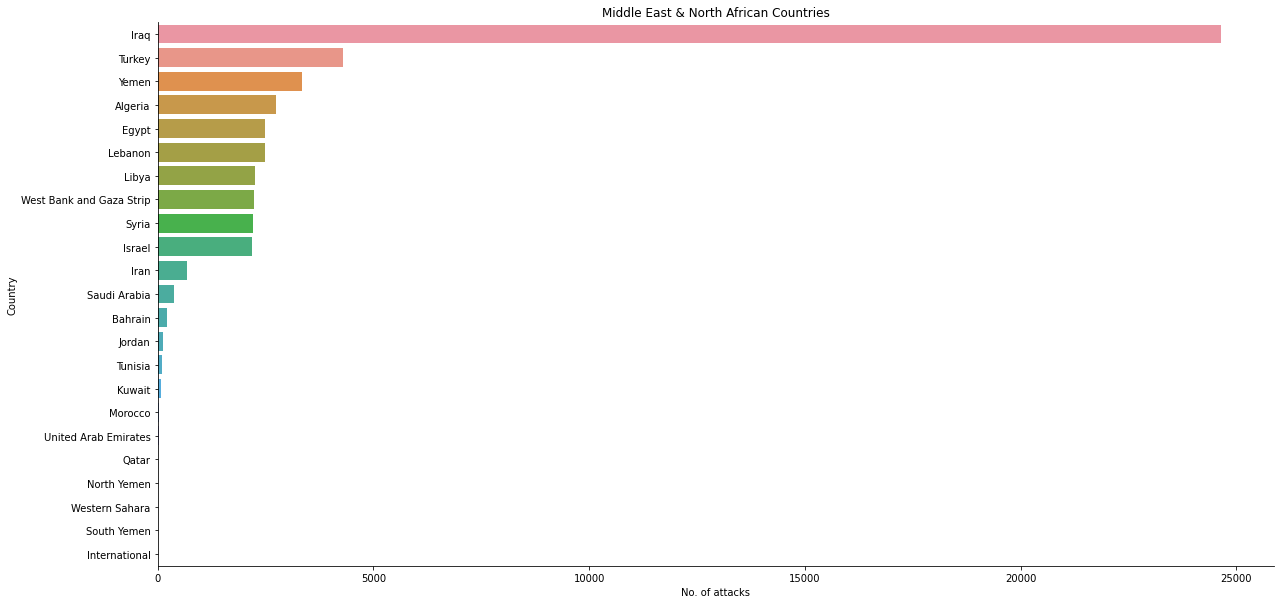

In [ ]:
plt.subplots(figsize=(20,10))
plt.title('Middle East & North African Countries')
plt.xlabel('No. of attacks')
plt.ylabel('Country')
# sns.set_color_codes("muted")
sns.color_palette("pastel") # Set2 , ("husl", 9), ("flare", as_cmap=True)"pastel"
sns.barplot( x = df[df['region']=='Middle East & North Africa'].country.value_counts().values, y=df[df['region']=='Middle East & North Africa']['country'].value_counts().index )
sns.despine()

###**Insight** 


---


Though the Region most hit by Terrorist activities is **Middle East and North Africa**, but any particular country, other than Iraq & Turkey - which also belogs particularly to **Middle East**, is individually not affected most.  The remaining countries, particularly **Afircan Countries** are worst and equally affected by Terrorism.
 
So, we can say that

1.   Of the whole region of Middle East and North Africa, no. of Middle east countries, affected by Terrorist Activities, is less than the no of African Countries.

2.   The most North African Countries are almost equally hit by Terrorism ie. whole region of North Africa is severely and almost equally facing Terrorism.



 

In [ ]:
df.city.value_counts()

Unknown          9775
Baghdad          7589
Karachi          2652
Lima             2359
Mosul            2265
                 ... 
Fashn               1
Abu Sanam           1
Vilgnambehena       1
Gdyel               1
Karatas             1
Name: city, Length: 36674, dtype: int64

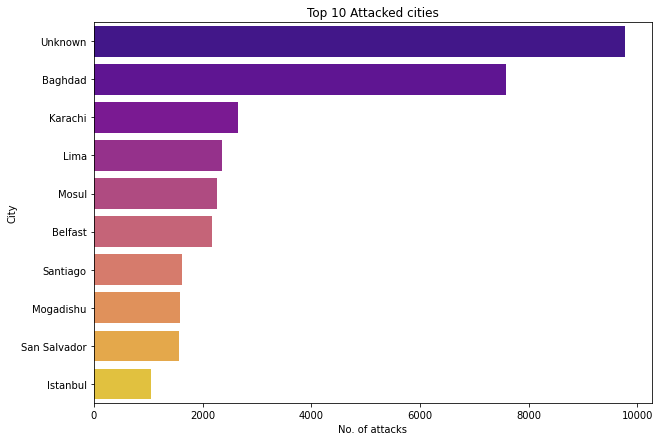

In [ ]:
#sns.barplot(x="Count", y="City Name", data=city_wise[:10],
#                 palette="Reds_d").set_title('Top 10 Attacked cities')

plt.subplots(figsize=(10, 7))
plt.title('Top 10 Attacked cities')
plt.xlabel('No. of attacks')
plt.ylabel('City')
sns.barplot( x = df.city.value_counts().values[:10], y = df.city.value_counts().index[:10], palette='plasma')

plt.show()


###**Insight** 


---
Unkown and Baghdad is most affected by attacks.

Also, though India is in top 5 most attacked countries, no single/particular Indian city is in list of most attacked cities.

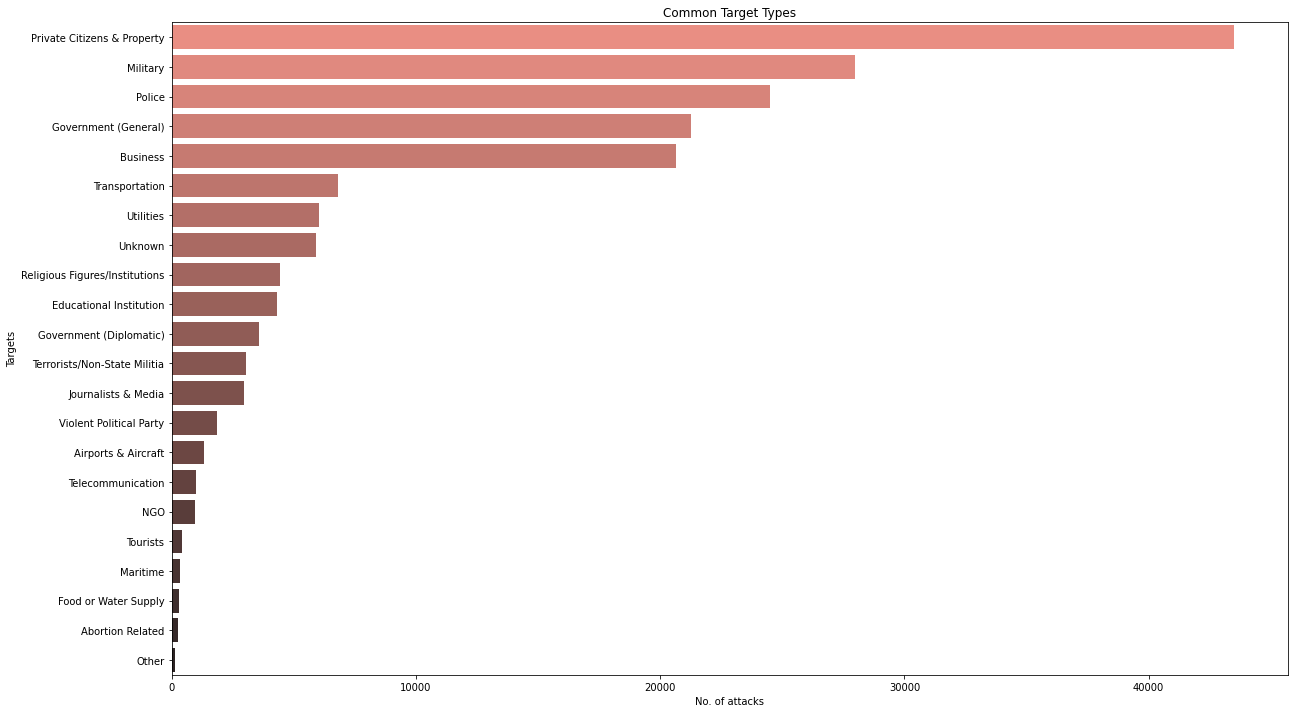

In [ ]:
# check the favourite target type of attackers

# print(df.target_type.value_counts())
# print(df.target_type.value_counts().index)
# print(df.target_type.value_counts().values)

plt.figure(figsize=(20, 12))
plt.title('Common Target Types')
plt.xlabel('No. of attacks')
plt.ylabel('Targets')
sns.barplot( y = df.target_type.value_counts().index, x = df.target_type.value_counts().values, palette='dark:salmon_r')

**Insight**  -- Most Aattacked Targets ( Top 5 )*



---




*   *Private Citizens & Property*
*   *Military*
*   *Police*
*   *Government*
*   *Business*





 

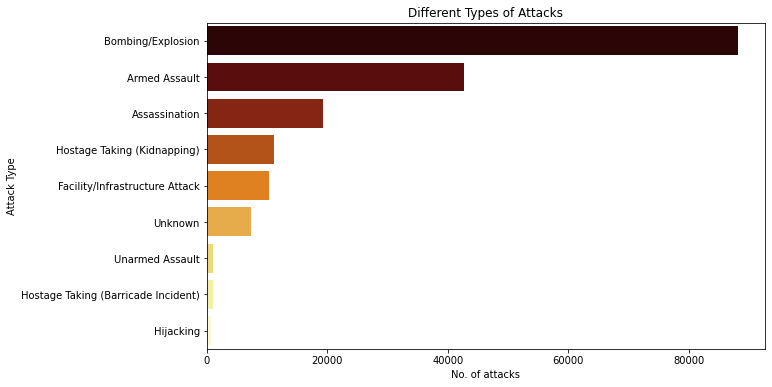

In [ ]:
# Most types of Attacks:

plt.figure(figsize=(10, 6))
plt.title('Different Types of Attacks')
plt.xlabel('No. of attacks')
plt.ylabel('Attack Type')
sns.barplot( x = df.attacktype.value_counts().values, y = df.attacktype.value_counts().index, palette = 'afmhot')

plt.show()

###**Insight** 


---

Method of attack mostly used by Terrorists are 
* **Bombimg/Explosion**
* **Armed Assault.**

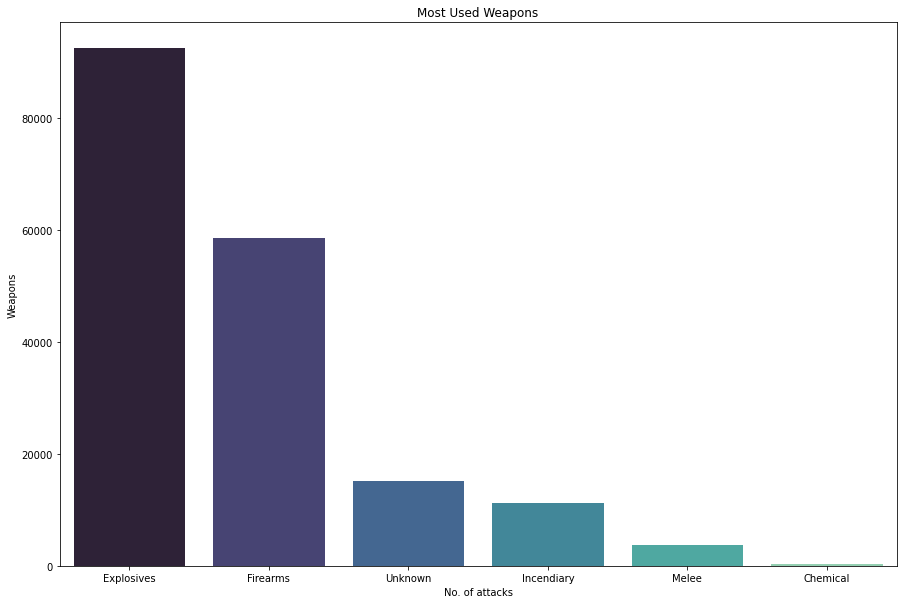

In [ ]:
# most used weapon for attack

plt.figure(figsize=(15, 10))
plt.title('Most Used Weapons')
plt.xlabel('No. of attacks')
plt.ylabel('Weapons')
sns.barplot( x = df.weaptype.value_counts().index[0:6], y = df.weaptype.value_counts().values[0:6], palette='mako')


**Insight**  -- Most Used Weapon For Targets ( Top 2 )*

*   Explosive
*   Firearms




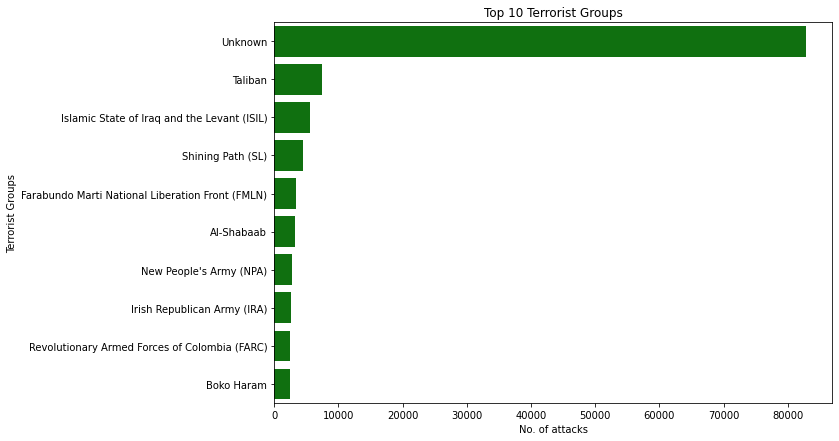

In [ ]:
plt.subplots(figsize=(10, 7))
plt.title('Top 10 Terrorist Groups')
plt.xlabel('No. of attacks')
plt.ylabel('Terrorist Groups')
sns.barplot( x = df.group_name.value_counts().values[:10], y = df.group_name.value_counts().index[:10], color = 'green')

plt.show()


In [ ]:
df[df['group_name']=='Taliban'].region.value_counts().index

Index(['South Asia', 'Central Asia'], dtype='object')

In [ ]:
df[df['group_name']=='Taliban'].country.value_counts().index

Index(['Afghanistan', 'Pakistan', 'Turkmenistan'], dtype='object')

In [ ]:
df[df['group_name']=='Islamic State of Iraq and the Levant (ISIL)'].region.value_counts().index

Index(['Middle East & North Africa', 'Southeast Asia', 'Western Europe',
       'Eastern Europe', 'Australasia & Oceania', 'Sub-Saharan Africa',
       'Central Asia'],
      dtype='object')

In [ ]:
df[df['group_name']=='Islamic State of Iraq and the Levant (ISIL)'].country.value_counts().index

Index(['Iraq', 'Syria', 'Turkey', 'Lebanon', 'Philippines', 'Saudi Arabia',
       'France', 'Jordan', 'Tunisia', 'Russia', 'Belgium',
       'West Bank and Gaza Strip', 'Egypt', 'United Kingdom', 'Iran', 'Libya',
       'Bahrain', 'Georgia', 'Australia', 'Israel', 'Yemen', 'Malaysia',
       'Germany', 'Indonesia', 'Somalia'],
      dtype='object')

###**Insight** 


---

Terrorist Groups responsible for most attacks are 
* **Unknown** - none of the terrorist organisation might have taken the responsibility of attacks or they remained unknown.
* **Taliban** - active mainly in Central & South Asian Countries like Afghanistan, Pakistan, Turkmenistan.
* **Islamic State of Iraq and the Levant (ISIL)** - **Highly Dangerous** as spread in almost every region of the world and attacked various countries in different Continents.